### Quickstart for TARDIS ###

Every simulation run requires the atomic database (for more info refer to [atomic data](../atomic/atomic_data.rst) ) and a configuration file (more info at [configuration](../configuration/index.rst) ).
You can obtain a copy of the atomic database from the
(https://github.com/tardis-sn/tardis-refdata) repository
(`atom_data` subfolder). We recommended to use the
`kurucz_cd23_chianti_H_He.h5` dataset (which is auto-downloaded in the second cell already). The configuration file for this quickstart is `tardis_example.yml`, which can be downloaded [here](https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml)), though this file is auto-downloaded in the third cell.

After the [installation](../installation.rst), start a Jupyter server executing `jupyter notebook` on the command line in a directory that contains this quickstart.

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/Users/wkerzend/miniconda/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


#### Downloading the atomic data ####

In [2]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


#### Downloading the example file ####

In [3]:
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   980  100   980    0     0   4394      0 --:--:-- --:--:-- --:--:--  4394


#### Running the simulation (long output) ####

In [4]:
#TARDIS now uses the data in the data repo
sim = run_tardis('tardis_example.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/wkerzend/projects/tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.93730e+42 erg / s Luminosity absorbed = 2.66400e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad    next_t_rad         w    next_w
	Shell                                        

[tardis.simulation.base][INFO   ]  t_inner 10025.810 K -- next t_inner 11278.874 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.32624e+43 erg / s Luminosity absorbed = 4.34986e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10590.775937  11489.769556  0.439574  0.511403
	5      11060.842307  11791.517605  0.154917  0.191127
	10     10761.665022  11527.732208  0.099840  0.120106
	15     10436.629671  11111.114390  0.074676  0.091713

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11278.874 K -- next t_inner 10079.967 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.51915e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10245.337 K -- next t_inner 11056.949 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.22623e+43 erg / s Luminosity absorbed = 4.00603e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 23.52 s (base.py:308)


#### Plotting the Spectrum ####

Populating the interactive namespace from numpy and matplotlib


(3000, 9000)

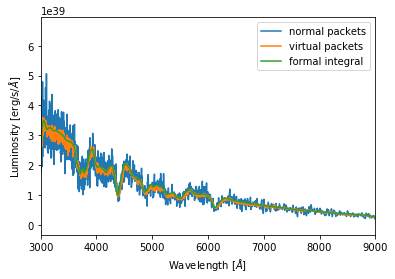

In [5]:
%pylab inline

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

figure(figsize=(10,6))
plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)